In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import networkx as nx
import pandas as pd
import contextily as cx

plt.rcParams["figure.figsize"] = (20,15)
plt.rc('font', size=12)

In [4]:
file = os.path.join("house","France.geojsonl") 
house =geopandas.read_file(file).to_crs("EPSG:4326")

In [59]:
file = os.path.join("house","Turkey.geojsonl") 
house_tk =geopandas.read_file(file)

In [5]:
states =geopandas.read_file(os.path.join("ne_10m_admin_0","ne_10m_admin_0_countries.shp"))
polygon = Polygon([(-15, 28), (50, 28), (50, 70), (-15, 70), (-15, 28)])
states_clip = states.clip(polygon)
states_clip.to_file(os.path.join("eu_base","eu_base.shp"))

c:\Users\czhou\anaconda3\envs\gas\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


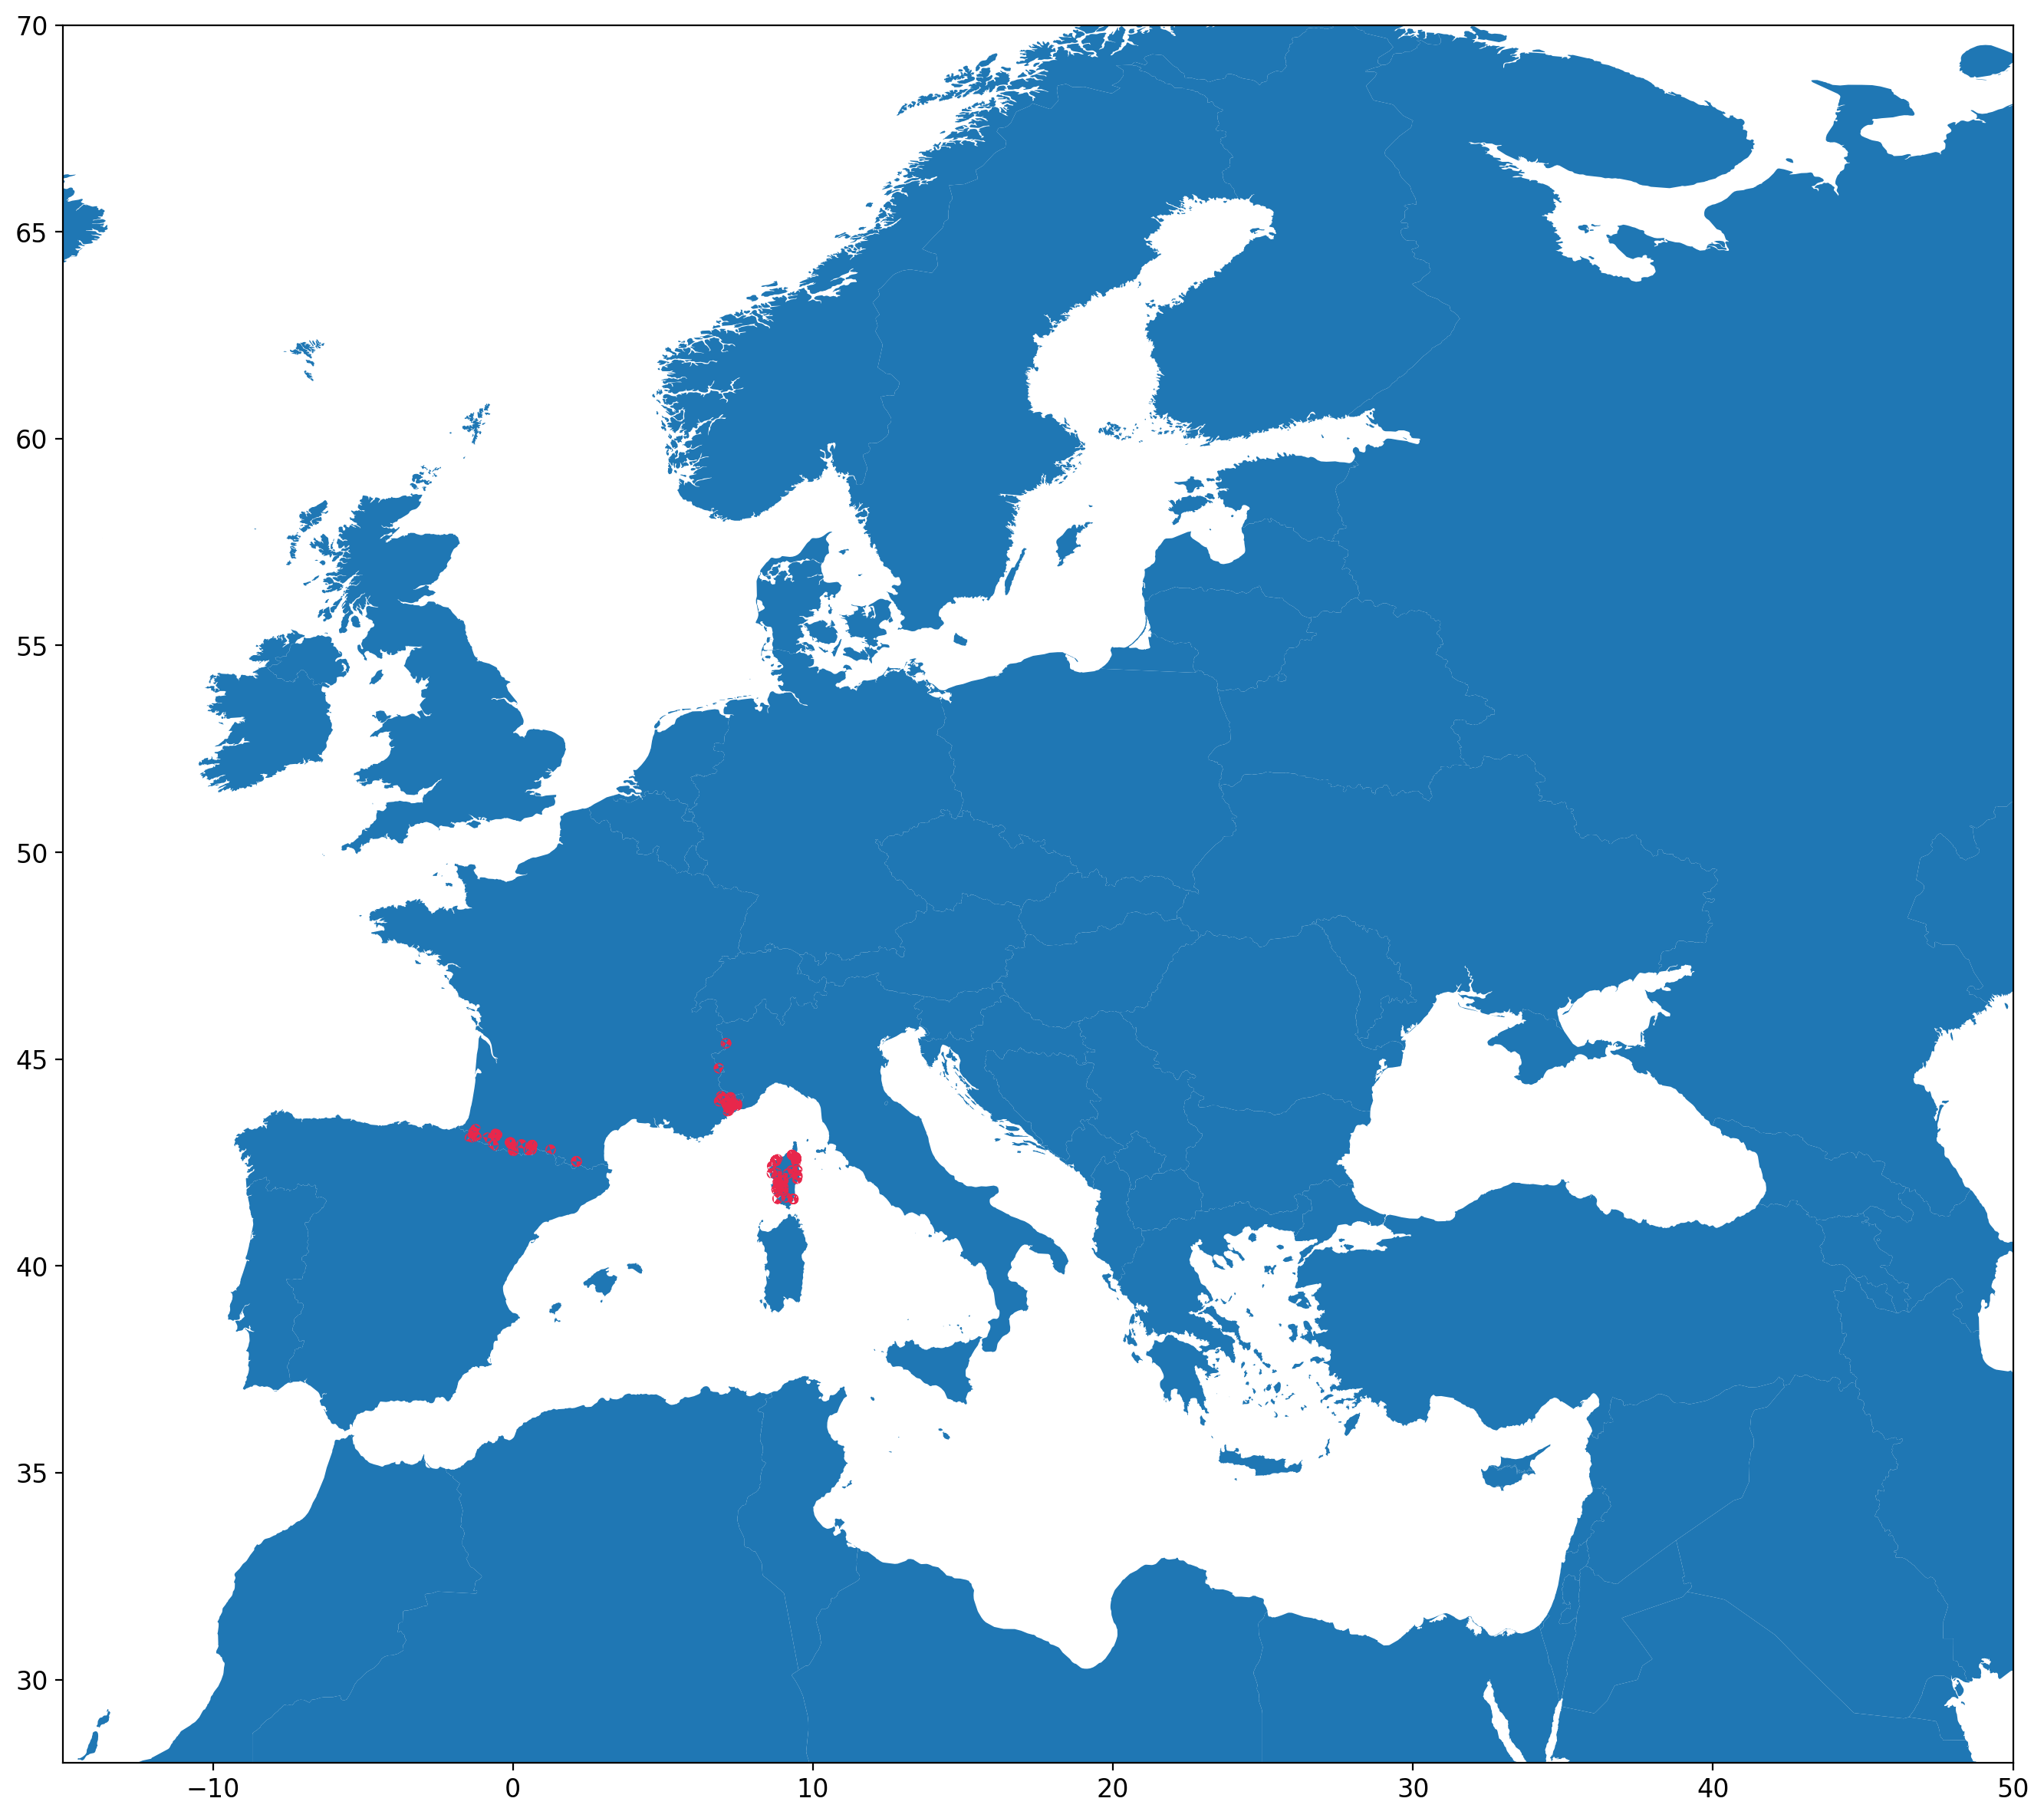

In [41]:
fig, ax = plt.subplots(figsize=(20, 15), dpi=200)
states_clip.plot(ax=ax, legend=False, )
house[0:100].plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
ax.margins(0)
plt.show()

In [56]:
h = house[0:]
h = h.to_crs(epsg=3857)

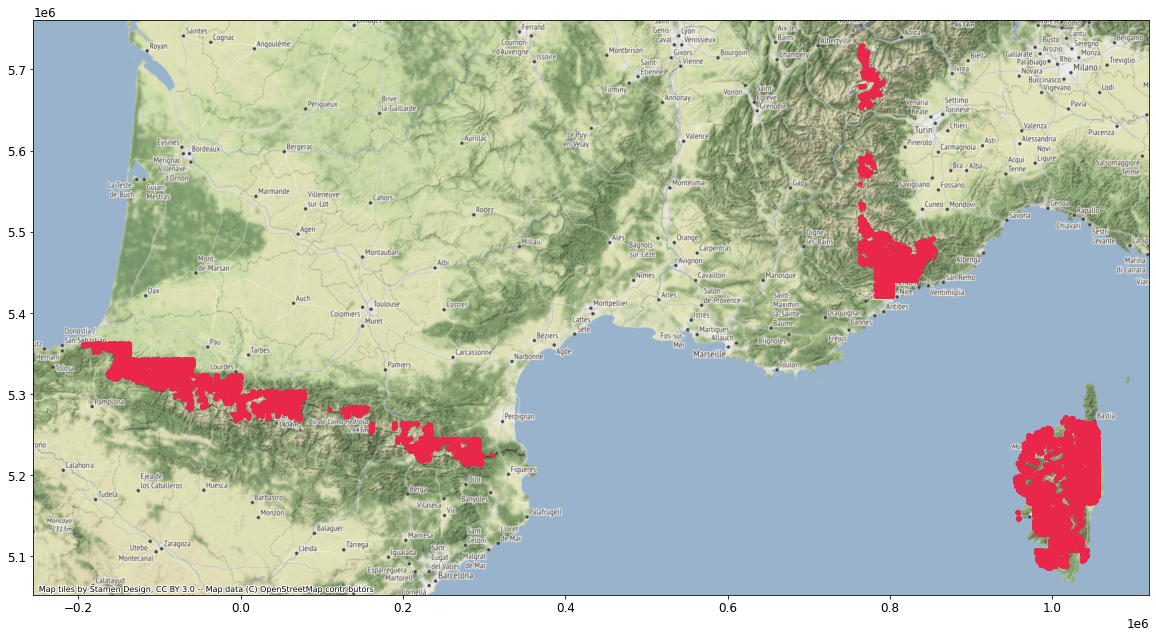

In [57]:
# df = states_clip.to_crs(epsg=3857)
# polygon = Polygon([(-4, 40), (11, 40), (11, 46), (-4, 46), (-4, 40)])
# df = df.clip(polygon)
# ax = df.plot(figsize=(30, 30), alpha=0.5, edgecolor='k')

ax = h.plot( color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax)

In [60]:
h_tk = house_tk.to_crs(epsg=3857)
h_tk

geometry
0         POLYGON ((3637555.293 5048017.976, 3637557.434...
1         POLYGON ((3787137.812 5009570.923, 3787143.653...
2         POLYGON ((3106362.924 4937710.749, 3106367.210...
3         POLYGON ((3144285.113 4652271.576, 3144291.694...
4         POLYGON ((3061035.510 4581108.701, 3061029.777...
...                                                     ...
18064077  POLYGON ((3391154.504 4516708.025, 3391151.101...
18064078  POLYGON ((3968586.700 4988297.630, 3968568.947...
18064079  POLYGON ((4142209.563 4893193.367, 4142209.818...
18064080  POLYGON ((4022668.406 4322602.000, 4022688.672...
18064081  POLYGON ((3645846.019 5079062.470, 3645847.983...

[18064082 rows x 1 columns]

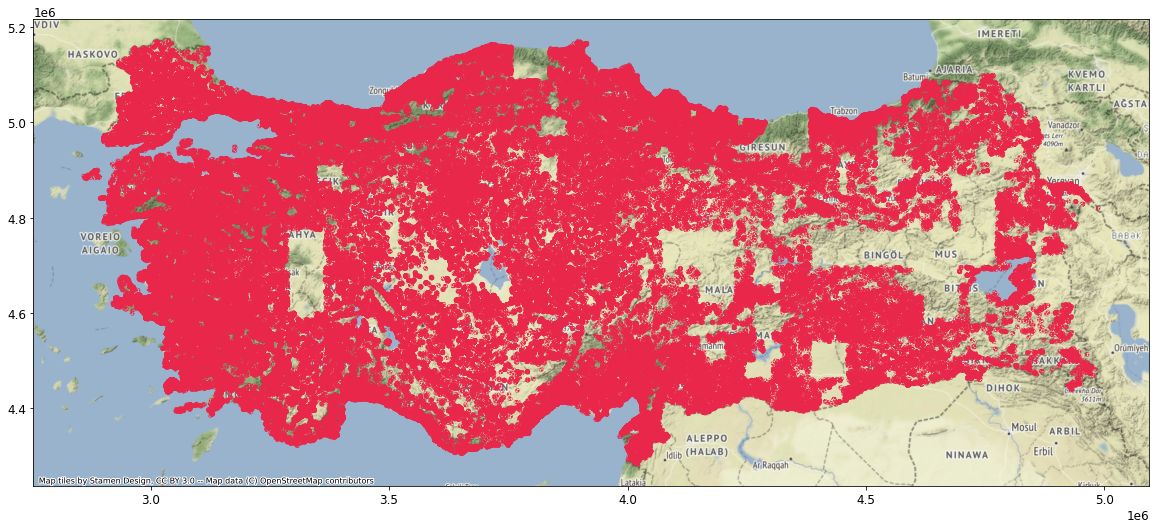

In [63]:
h = h_tk.sample(200000)
ax = h.plot( color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax)

In [71]:
file = "NUTS_RG_01M_2016_4326.shp.zip"
states =geopandas.read_file(os.path.join(file)).to_crs("EPSG:3857")
ISTANBUL = states.loc[states["NAME_LATN"]=="ISTANBUL"]["geometry"]

In [107]:
h_istanbul = h_tk.sample(100000).clip(ISTANBUL)

geometry
16708187  POLYGON ((3262239.645 4985674.847, 3262242.302...
18023669  POLYGON ((3263023.060 4985860.147, 3263022.080...
1209157   POLYGON ((3263634.963 4985904.270, 3263643.132...
5812087   POLYGON ((3263274.467 4985899.844, 3263272.036...
14685439  POLYGON ((3267061.708 4986162.646, 3267085.787...
...                                                     ...
1375449   POLYGON ((3152579.380 5021227.183, 3152592.626...
12558472  POLYGON ((3125555.086 5021230.519, 3125560.043...
7657730   POLYGON ((3151043.015 5021262.192, 3151046.743...
295347    POLYGON ((3154830.211 5021288.814, 3154814.910...
10467327  POLYGON ((3155699.031 5021359.075, 3155700.067...

[4814 rows x 1 columns]

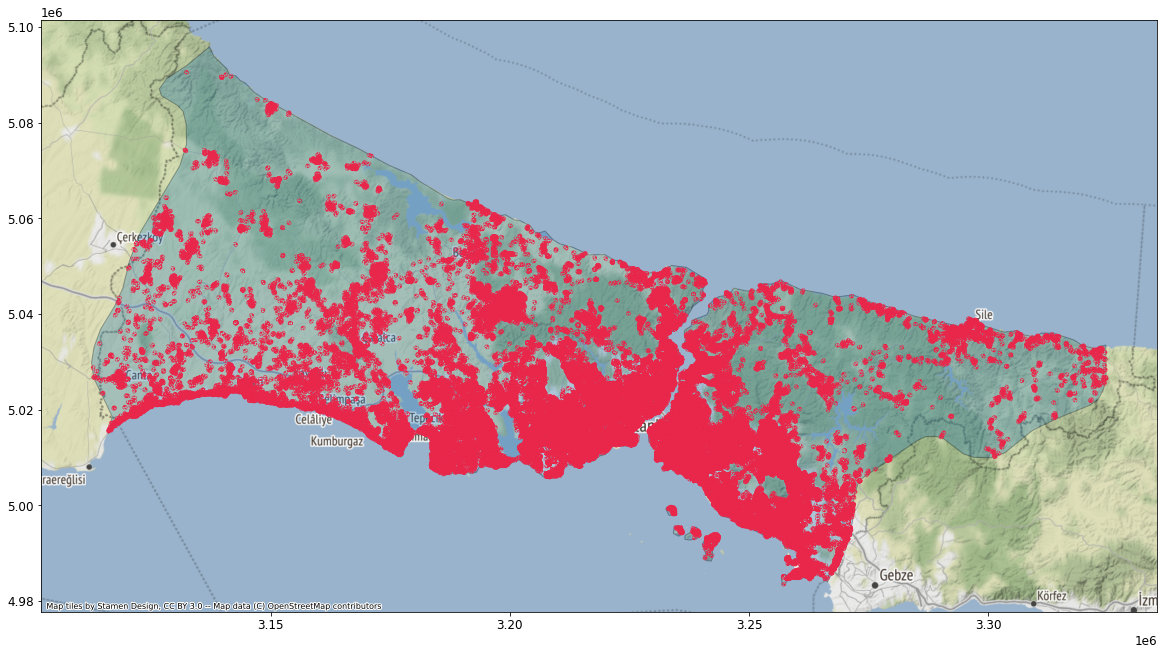

In [106]:
ax = ISTANBUL.plot( alpha=0.3, edgecolor='k')
ax = h_istanbul.plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax)

In [82]:
x=[]
for i in range(500):
    print(i)
    x.append(len(h_tk.sample(100000).clip(ISTANBUL))/100000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157


TopologyException: Input geom 0 is invalid: Self-intersection at 3233973.4174206941 5030054.3006623378


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x0000011DE5965A30>

In [100]:
h_istanbul = h_tk.sample(1000000).clip(ISTANBUL)

In [168]:
large_h = h_istanbul.loc[h_istanbul.area/ISTANBUL.area.sum()*5343*1e6<200]
large_h = large_h.loc[large_h.area/ISTANBUL.area.sum()*5343*1e6>=20]

In [169]:
len(large_h)/len(h_istanbul)*100

53.959638718330226

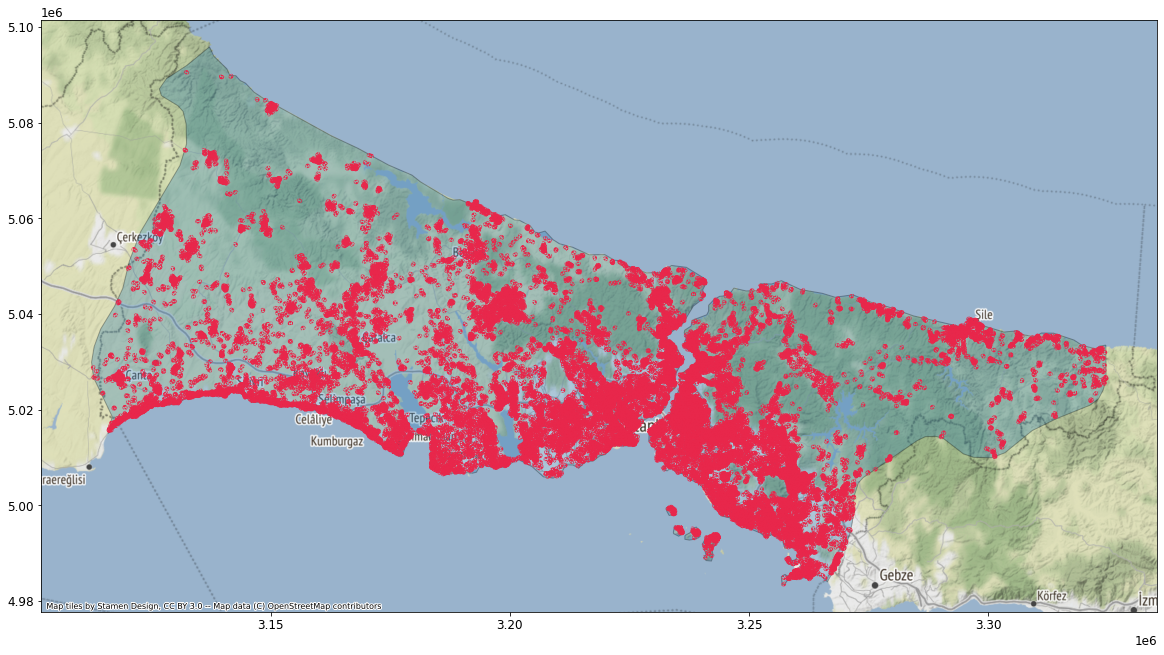

In [170]:
ax = ISTANBUL.plot( alpha=0.3, edgecolor='k')
ax = large_h.plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,  1.,
         3.,  6.,  2., 11.,  1.,  5.,  8., 12., 18., 21., 26., 29., 27.,
        36., 23., 42., 41., 39., 56., 48., 53., 42., 56., 52., 68., 62.,
        54., 67., 57., 69., 66., 60., 60., 68., 61., 58., 80., 68., 65.,
        62., 66., 66., 74., 68., 64., 55., 78., 56., 63., 58., 81., 57.,
        70., 48., 61., 62., 71., 55., 91., 62., 68., 67., 64., 53., 71.,
        62., 61., 63., 54., 65., 69., 57., 55., 64., 58., 61., 52., 59.,
        70., 39., 62., 63., 66., 56., 54., 55., 58., 48., 55., 53., 51.,
        53., 61., 51., 39., 46., 44., 46., 56., 45., 52., 39., 41., 46.,
        53., 49., 50., 43., 47., 40., 51., 39., 41., 43., 36., 40., 30.,
        37., 46., 42., 37., 48., 36., 50., 44., 51., 59., 51., 43., 48.,
        42., 41., 37., 43., 28., 57., 33., 34., 41., 30., 34., 28., 37.,
        40., 34., 37., 35., 36., 34., 29., 38., 46.

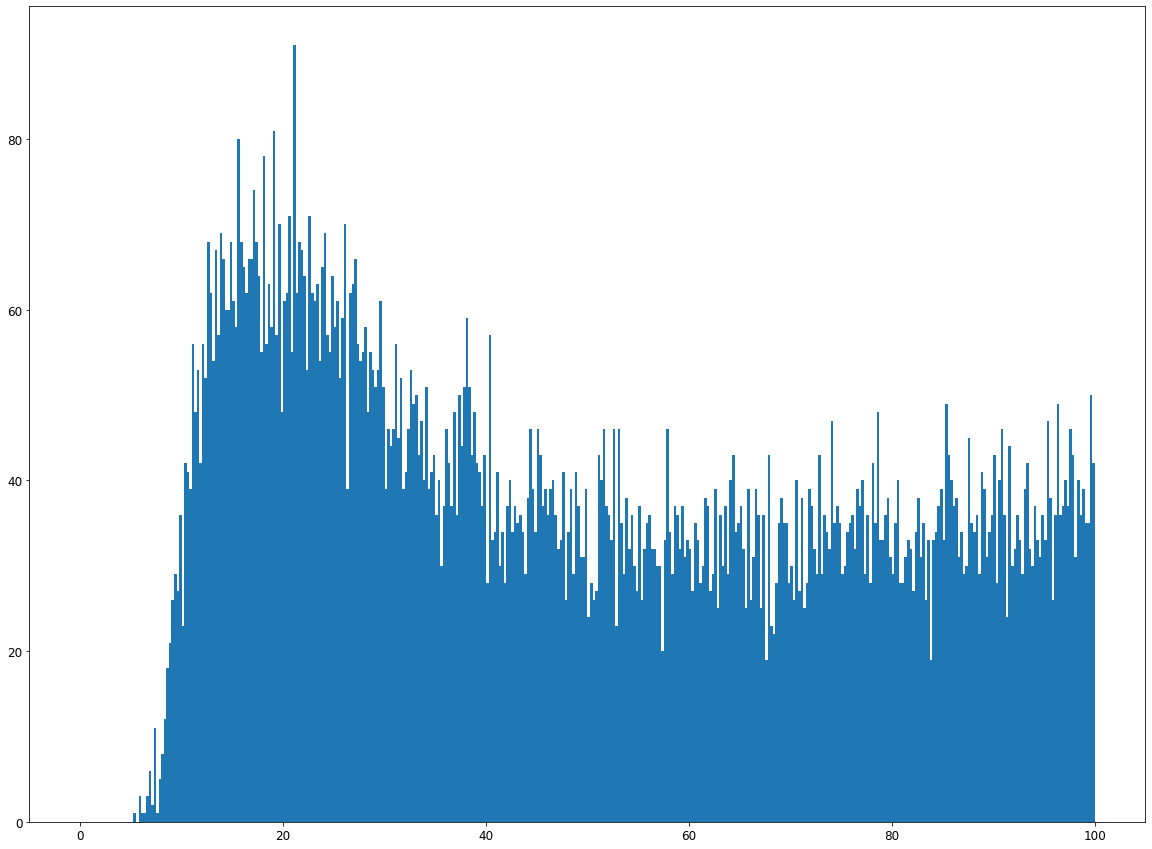

In [178]:
plt.hist(h_istanbul.area/ISTANBUL.area.sum()*5343*1e6, range=(0,100), bins=400)

In [119]:
h_istanbul.area.sum()/0.494/ISTANBUL.area.sum()*100

0.5539484193011874

In [136]:
a = h_istanbul.area/ISTANBUL.area.sum()*5343*1e6
a.max()

193005.77457294383

In [115]:
h_istanbul

geometry
6326494   POLYGON ((3132357.152 5090511.515, 3132352.304...
4856680   POLYGON ((3150010.170 5082616.121, 3150000.022...
13359137  POLYGON ((3149561.879 5082636.447, 3149557.579...
2131282   POLYGON ((3150182.831 5082638.923, 3150178.076...
2783407   POLYGON ((3150176.210 5082662.047, 3150172.721...
...                                                     ...
14143945  POLYGON ((3258330.661 4984999.957, 3258364.691...
8859534   POLYGON ((3260303.264 4984986.148, 3260304.616...
4938952   POLYGON ((3259563.446 4984998.728, 3259568.873...
3834764   POLYGON ((3260730.898 4984983.858, 3260731.782...
10985263  POLYGON ((3259475.894 4984996.485, 3259479.239...

[47719 rows x 1 columns]